In [6]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt

from drawing import draw_window
from image import get_image_tensor, get_numpy_image
from shape import Window
from roi_align import RoIAlignFeatureExtractor
from matcher import Window
from image import load_image

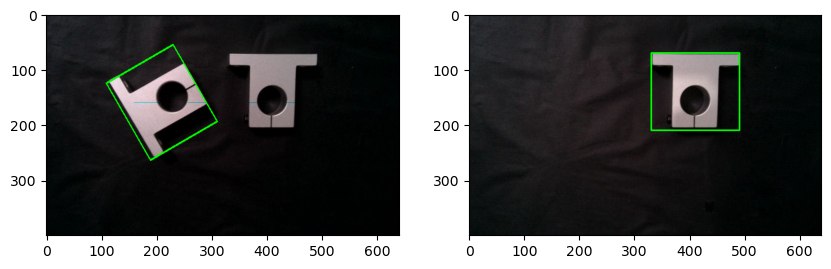

In [7]:
target_img = load_image('../data/image_1.png')
template_img = load_image('../data/template_1.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

target_window = Window(210, 160, 160, 140, -120)
draw_img = draw_window(target_img, target_window)
axes[0].imshow(draw_img)
axes[0].set_title('target')

template_window = Window(410., 140., 160., 140., 0)
draw_img = draw_window(template_img, template_window)
axes[1].imshow(draw_img)
axes[1].set_title('template')

(100, 100, 3)


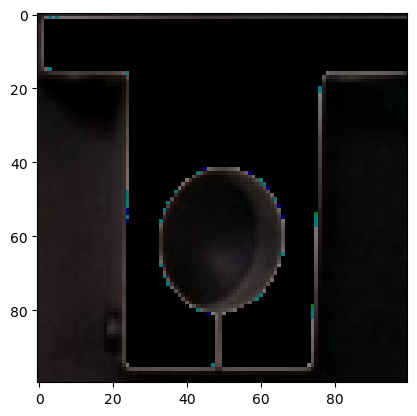

In [8]:
roi_feature_extractor = RoIAlignFeatureExtractor(output_size=100, sampling_ratio=2)

template_tensor = get_image_tensor(template_img)
template_feature_maps = template_tensor.float()

roi_features = roi_feature_extractor.extract(template_feature_maps, template_window, spatial_scale=1)
roi_features = get_numpy_image(roi_features.reshape(1, 3, 100, 100)).astype(np.int8)
print(roi_features.shape)
plt.imshow(roi_features)

(100, 100, 3)


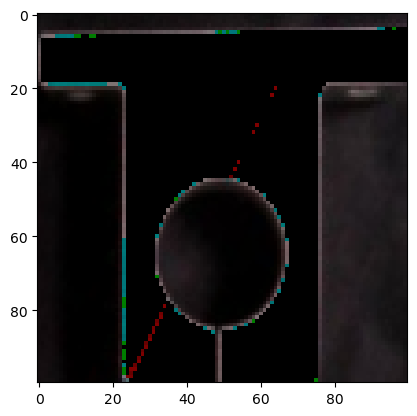

In [9]:
target_tensor = get_image_tensor(target_img)
target_feature_maps = target_tensor.float()

roi_features = roi_feature_extractor.extract(target_feature_maps, target_window, spatial_scale=1)
roi_features = get_numpy_image(roi_features.reshape(1, 3, 100, 100)).astype(np.int8)
print(roi_features.shape)
plt.imshow(roi_features)